### **Network Analysis Tutorial**
## 2023-11-09

## **1. Setting up environment**

In [59]:
## Install or load packages required
!pip install panda
!pip install igraph
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.1/347.1 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects


In [111]:
import pandas as pd
import igraph
import matplotlib.pyplot as plt
import matplotlib as mpl

## **2. Read in dataset**

*2.1 MalaCard CML dataset from GitHub*

In [6]:
CMLfile="https://raw.githubusercontent.com/chengwailei/YUHS_NetworkAnalysis/main/data/CML_MalaCard_Gene.csv"

CML_keygenes_df=pd.read_csv(CMLfile)

In [7]:
CML_keygenes_df

,Symbol,Description,Category,Score,Evidence
0,ABL1,"ABL Proto-Oncogene 1, Non-Receptor Tyrosine Ki...",Protein Coding,1306.92,Molecular_basis_known
1,ABL1,"ABL Proto-Oncogene 1, Non-Receptor Tyrosine Ki...",Protein Coding,1306.92,Pathogenic
2,ABL1,"ABL Proto-Oncogene 1, Non-Receptor Tyrosine Ki...",Protein Coding,1306.92,Gene_fusion
3,ABL1,"ABL Proto-Oncogene 1, Non-Receptor Tyrosine Ki...",Protein Coding,1306.92,Likely_pathogenic
4,ABL1,"ABL Proto-Oncogene 1, Non-Receptor Tyrosine Ki...",Protein Coding,1306.92,Diseases_inferred
...,...,...,...,...,...
412,MTOR,Mechanistic Target Of Rapamycin Kinase,Protein Coding,6.63,Diseases_inferred
413,GOLGA4,Golgin A4,Protein Coding,6.61,Diseases_inferred
414,HLA-A,"Major Histocompatibility Complex, Class I, A",Protein Coding,6.59,Diseases_inferred
415,JAK1,Janus Kinase 1,Protein Coding,6.59,Diseases_inferred


*2.2 STRING interactome datset from STRING*

In [11]:
STRINGfile="https://stringdb-downloads.org/download/protein.physical.links.v12.0/9606.protein.physical.links.v12.0.txt.gz"

interactome_df = pd.read_csv(STRINGfile,sep = " ")

In [12]:
interactome_df

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000257770,311
1,9606.ENSP00000000233,9606.ENSP00000226004,161
2,9606.ENSP00000000233,9606.ENSP00000434442,499
3,9606.ENSP00000000233,9606.ENSP00000262455,531
4,9606.ENSP00000000233,9606.ENSP00000303145,499
...,...,...,...
1477605,9606.ENSP00000501317,9606.ENSP00000444357,292
1477606,9606.ENSP00000501317,9606.ENSP00000296785,962
1477607,9606.ENSP00000501317,9606.ENSP00000361930,195
1477608,9606.ENSP00000501317,9606.ENSP00000370745,188


*2.3 STRING protein alias dataset*

In [16]:
STRINGAliasFile="https://stringdb-downloads.org/download/protein.aliases.v12.0/9606.protein.aliases.v12.0.txt.gz"

alias_df = pd.read_csv(STRINGAliasFile, sep = "\t", na_filter= False)

## Rename column names
alias_df.columns = ["protein_name", "alias", "source"]

In [17]:
alias_df

,protein_name,alias,source
0,9606.ENSP00000000233,2B6H,Ensembl_PDB
1,9606.ENSP00000000233,2B6H,UniProt_DR_PDB
2,9606.ENSP00000000233,381,Ensembl_HGNC_entrez_id
3,9606.ENSP00000000233,381,KEGG_GENEID
4,9606.ENSP00000000233,381,KEGG_KEGGID_SHORT
...,...,...,...
3889202,9606.ENSP00000501317,regulatory factor X domain containing 2,Ensembl_HGNC_prev_name
3889203,9606.ENSP00000501317,"regulatory factor X, 7",Ensembl_HGNC_prev_name
3889204,9606.ENSP00000501317,regulatory factor X7,Ensembl_HGNC_name
3889205,9606.ENSP00000501317,uc059jng.1,Ensembl_HGNC_ucsc_id


## **3. Define the gene of interests**

We are interested in protein encoding genes that are diseases inferred in the MalaCard geneset.

In [91]:
CML_keygenes_list = CML_keygenes_df[(CML_keygenes_df["Category"] == "Protein Coding") & (CML_keygenes_df["Evidence"] == "Diseases_inferred")]
CML_keygenes_list = CML_keygenes_list["Symbol"].tolist()

## Extract only unique values
CML_keygenes_list = list(set(CML_keygenes_list))
print(CML_keygenes_list)

['CDKN2B', 'THPO', 'MEIS1', 'G6PD', 'CDK2', 'BCL2', 'MLLT3', 'CD177', 'MECOM', 'TAL1', 'CDKN1C', 'STAT1', 'CALR', 'KIT', 'JAK2', 'ABL1', 'EPOR', 'KIR3DL1', 'CCND2', 'MAPK14', 'WT1', 'ABCC1', 'FLT3', 'PIK3CG', 'LEF1', 'ANXA5', 'NF1', 'STAT5A', 'CD8A', 'BIRC3', 'CD34', 'ABL2', 'NOTCH1', 'PRTN3', 'RASA1', 'PTPN1', 'MYC', 'CD4', 'BACH2', 'NFKBIA', 'PLK1', 'IL11', 'MNDA', 'CEACAM8', 'IFNA1', 'CASP9', 'TNFRSF10B', 'TET2', 'INPP5D', 'BMI1', 'CTNNB1', 'DNMT3A', 'IRF4', 'SIRPA', 'NTRK1', 'MTOR', 'AXL', 'PTPN11', 'BIRC5', 'LUC7L2', 'DNMT1', 'MAPK9', 'JAK1', 'CD38', 'LCK', 'SRC', 'MPL', 'CREB1', 'BCL2L11', 'GOLGA4', 'APAF1', 'HLA-A', 'ETV6', 'BRAF', 'CSF2', 'HSPA8', 'FCGR3B', 'TP53', 'SLC22A1', 'PRAME', 'CDC25A', 'CSF3', 'ERBB2', 'BCL2L1', 'HOXA9', 'GRB2', 'CCNA2', 'NPM1', 'H4C16', 'PDGFRB', 'HOXA10', 'NME1', 'DNTT', 'TKT', 'KLRK1', 'GZMB', 'HRAS', 'ADA', 'CASP3', 'NTRK3', 'CBFB', 'AKT1', 'PRODH', 'NUP98', 'STAT5B', 'CSF2RA', 'ITGB3', 'ITGB1', 'KRAS', 'H2AC18', 'TNFRSF10A', 'ABCG2', 'EIF4E', 'CRK

❓**Time for Question 1 & 2**

Try and edit the code and answer quiz questions 1 and 2 on Slido.

Slido.com: # 1675300

We need to subset to get the Ensembl protein IDs by their gene names. Note that some alias may not have a corresponding protein name. This might be due to the uses of different alias in the interactome or it is not recorded at all.

In [28]:
alias_df_1 = alias_df[alias_df["source"] == "KEGG_NAME"]

keygenes_Ensembl = alias_df_1[alias_df_1["alias"].isin(CML_keygenes_list)]

keygenes_Ensembl_list = keygenes_Ensembl["protein_name"].tolist()
keygenes_Ensembl_list = list(set(keygenes_Ensembl_list))

**4. Extract subnetwork**

To extract the CML subnetwork, we keep interactions that involve our genes of interests

In [40]:
CML_network = interactome_df[(interactome_df["protein1"].isin(keygenes_Ensembl_list)) &
                             (interactome_df["protein2"].isin(keygenes_Ensembl_list))]

CML_network

,protein1,protein2,combined_score
3609,9606.ENSP00000011653,9606.ENSP00000341189,422
3635,9606.ENSP00000011653,9606.ENSP00000477713,999
3646,9606.ENSP00000011653,9606.ENSP00000391592,360
3659,9606.ENSP00000011653,9606.ENSP00000494750,226
3661,9606.ENSP00000011653,9606.ENSP00000411355,321
...,...,...,...
1475313,9606.ENSP00000499900,9606.ENSP00000362195,898
1475314,9606.ENSP00000499900,9606.ENSP00000276927,940
1475325,9606.ENSP00000499900,9606.ENSP00000371067,998
1475338,9606.ENSP00000499900,9606.ENSP00000330341,998


We have the list of interactions, which is huge (4,232 interaction). They are not all relevant though. STRING provides a separate column "combined_score" which denotes how confident they are with the interaction. This reflects whether the interaction is simply predicted due to co-mentioning in literature or tested experimentally for their interaction.

A middle, and widely accepted cut-off is 400. We want to aim for a higher confidence at **800**. This can be done by:


In [41]:
CML_network = CML_network[(CML_network["combined_score"] >= 800)]
CML_network

,protein1,protein2,combined_score
3635,9606.ENSP00000011653,9606.ENSP00000477713,999
3670,9606.ENSP00000011653,9606.ENSP00000386559,900
25835,9606.ENSP00000215832,9606.ENSP00000401888,813
25862,9606.ENSP00000215832,9606.ENSP00000269305,893
25891,9606.ENSP00000215832,9606.ENSP00000256078,837
...,...,...,...
1475313,9606.ENSP00000499900,9606.ENSP00000362195,898
1475314,9606.ENSP00000499900,9606.ENSP00000276927,940
1475325,9606.ENSP00000499900,9606.ENSP00000371067,998
1475338,9606.ENSP00000499900,9606.ENSP00000330341,998


❓**Time for Question 3**

Try and answer quiz question 3 on Slido!

Now we have a protein network but the Ensembl Protein IDs are confusing. We can add the alias name from the keygenes_Ensembl that we have generated.

In [42]:
CML_network = pd.merge(CML_network,
              keygenes_Ensembl[["protein_name","alias"]],
              left_on = "protein1",
              right_on = "protein_name")

CML_network.drop("protein_name", inplace = True, axis = 1)

CML_network.columns = ["protein1", "protein2", "combined_score","protein1_alias"]

In [43]:
CML_network = pd.merge(CML_network,
              keygenes_Ensembl[["protein_name","alias"]],
              left_on = "protein2",
              right_on = "protein_name")

CML_network.drop("protein_name", inplace = True, axis = 1)

CML_network.columns = ["protein1", "protein2", "combined_score","protein1_alias", "protein2_alias"]

In [44]:
CML_network

,protein1,protein2,combined_score,protein1_alias,protein2_alias
0,9606.ENSP00000011653,9606.ENSP00000477713,999,CD4,LCK
1,9606.ENSP00000264033,9606.ENSP00000477713,854,CBL,LCK
2,9606.ENSP00000264657,9606.ENSP00000477713,906,STAT3,LCK
3,9606.ENSP00000362680,9606.ENSP00000477713,867,SRC,LCK
4,9606.ENSP00000365012,9606.ENSP00000477713,862,HCK,LCK
...,...,...,...,...,...
747,9606.ENSP00000477713,9606.ENSP00000411355,984,LCK,PTPRC
748,9606.ENSP00000477908,9606.ENSP00000246657,857,CCL3,CCR7
749,9606.ENSP00000477908,9606.ENSP00000343952,939,CCL3,CCR6
750,9606.ENSP00000497102,9606.ENSP00000485129,957,CTLA4,ICOSLG


**Save network**

To ensure we can retrieve the same result in each run, saving the network would be helpful. This also helps to feed the result to other pipelines.

In [46]:
CML_network.to_csv("CML_network.csv", index=False)

CML_network = pd.read_csv("CML_network.csv")

CML_network

,protein1,protein2,combined_score,protein1_alias,protein2_alias
0,9606.ENSP00000011653,9606.ENSP00000477713,999,CD4,LCK
1,9606.ENSP00000264033,9606.ENSP00000477713,854,CBL,LCK
2,9606.ENSP00000264657,9606.ENSP00000477713,906,STAT3,LCK
3,9606.ENSP00000362680,9606.ENSP00000477713,867,SRC,LCK
4,9606.ENSP00000365012,9606.ENSP00000477713,862,HCK,LCK
...,...,...,...,...,...
747,9606.ENSP00000477713,9606.ENSP00000411355,984,LCK,PTPRC
748,9606.ENSP00000477908,9606.ENSP00000246657,857,CCL3,CCR7
749,9606.ENSP00000477908,9606.ENSP00000343952,939,CCL3,CCR6
750,9606.ENSP00000497102,9606.ENSP00000485129,957,CTLA4,ICOSLG


**5. Network as network**

*5.1 Converting to network*

Up until now, we are subsetting the network as a datatable (a.k.a edgelist, as the table stores the edges of the data). To run any algorithms, we will need to read it as a network.
The library we are using is igraph, which you should have loaded at the start of the tutorial

In [63]:
## Generate tuple from dataframe
tuples = [tuple(x) for x in CML_network[["protein1_alias", "protein2_alias"]].values]

g = igraph.Graph.TupleList(tuples, directed = False)

*5.2 Visualise the graph*

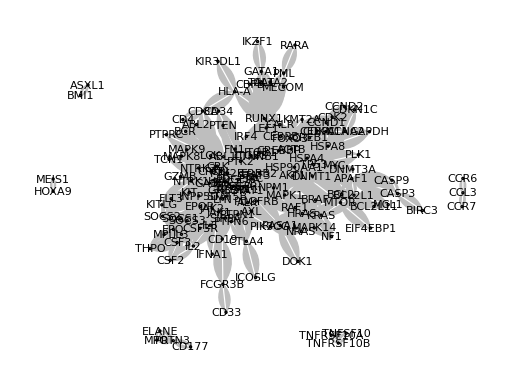

In [76]:
fig, ax = plt.subplots()
igraph.plot(g,
            target = ax,
            vertex_size = 2,
            vertex_color = "white",
            edge_color = "grey",
            edge_width = 1,
            edge_arrow_size = 0,
            vertex_label = g.vs["name"],
            vertex_label_size = 8
            )

The nodes are all clustered together. The best way to overcome this is to adjust the layout.

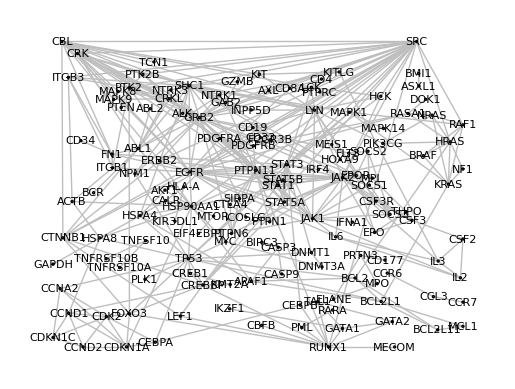

In [84]:
fig, ax = plt.subplots()

lay = g.layout_davidson_harel(weight_edge_lengths = g.density()/1000)

igraph.plot(g.simplify(),
            target = ax,
            layout = lay,
            vertex_size = 2,
            vertex_color = "white",
            edge_color = "grey",
            edge_width = 1,
            edge_arrow_size = 0,
            vertex_label = g.vs["name"],
            vertex_label_size = 8
            )

❓**Time for Question 4**

Try and answer quiz question 4 on Slido!

**6. Centrality Measures**

In the previous lectures, we learnt about several centrality scores. The algorithms measure the topology of the network and give us some insights on the node or edge importances. In this exercise, we use the CML network and calculate some centralities we have described.

*6.1 Degree centrality*

Degree centrality measures the number of edges connected to the nodes. We use the `degree()`
function from igraph to calculate the degree centrality of the CML network.

In [90]:
degree_centrality = g.degree()
degree_centrality = dict(zip(g.vs["name"], degree_centrality))

print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))

[('GRB2', 29), ('SRC', 26), ('EGFR', 23), ('JAK2', 23), ('SHC1', 21), ('PTPN11', 21), ('STAT3', 19), ('JAK1', 17), ('TP53', 16), ('HSP90AA1', 16), ('CBL', 15), ('LYN', 15), ('RUNX1', 12), ('CRK', 12), ('PTK2', 12), ('CRKL', 12), ('CREBBP', 11), ('ABL1', 11), ('EPOR', 10), ('STAT5A', 10), ('LCK', 9), ('HRAS', 9), ('ERBB2', 9), ('STAT5B', 9), ('STAT1', 9), ('CTNNB1', 8), ('PDGFRA', 8), ('MAPK1', 7), ('KRAS', 7), ('HSPA4', 7), ('FOXO3', 7), ('PTK2B', 7), ('FN1', 7), ('CDK2', 7), ('CDKN1A', 7), ('RAF1', 6), ('BCL2L1', 6), ('HSPA8', 6), ('PDGFRB', 6), ('ITGB3', 6), ('PTPN6', 6), ('CCND1', 6), ('APAF1', 6), ('HCK', 5), ('NRAS', 5), ('BCL2', 5), ('GAB2', 5), ('CSF3', 5), ('SOCS3', 5), ('IL6', 5), ('IL3', 5), ('RASA1', 5), ('ITGB1', 5), ('BRAF', 4), ('CEBPA', 4), ('CCNA2', 4), ('NTRK1', 4), ('EPO', 4), ('KIT', 4), ('CSF3R', 4), ('IL2', 4), ('SOCS1', 4), ('SOCS2', 4), ('CCND2', 4), ('CDKN1C', 4), ('ACTB', 4), ('GATA1', 4), ('CD8A', 3), ('HLA-A', 3), ('NPM1', 3), ('DNMT1', 3), ('CREB1', 3), ('MY

**Visualise network by centrality scores**

We can visualise the degree centrality on the network plot itself.

In [121]:
## function to define colors
minima = min(g.degree())
maxima = max(g.degree())

norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.YlOrBr)

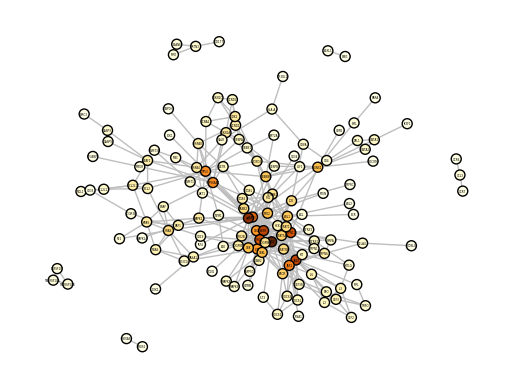

In [123]:
fig, ax = plt.subplots()

g.vs["color"] = [mapper.to_rgba(v) for v in g.degree()]

igraph.plot(g,
            target = ax,
            vertex_size = 10,
            edge_color = "grey",
            edge_width = 1,
            edge_arrow_size = 0,
            vertex_label = g.vs["name"],
            vertex_label_size = 2,
            vertex_color = g.vs['color']
            )

*6.2 Closeness centrality*

Closeness centrality describe how far a node is from other nodes. We use the `closeness()` function from igraph to calculate the closeness centrality of the CML network.

In [124]:
closeness_centrality = g.closeness()
closeness_centrality = dict(zip(g.vs["name"], closeness_centrality))

print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))

[('TNFRSF10A', 1.0), ('TNFRSF10B', 1.0), ('TNFSF10', 1.0), ('PRTN3', 1.0), ('CCL3', 1.0), ('MEIS1', 1.0), ('HOXA9', 1.0), ('ASXL1', 1.0), ('BMI1', 1.0), ('MPO', 0.75), ('ELANE', 0.75), ('CCR7', 0.6666666666666666), ('CCR6', 0.6666666666666666), ('CD177', 0.6), ('SRC', 0.4810606060606061), ('STAT3', 0.4471830985915493), ('EGFR', 0.4471830985915493), ('GRB2', 0.436426116838488), ('PTPN11', 0.4276094276094276), ('HSP90AA1', 0.4219269102990033), ('SHC1', 0.41776315789473684), ('JAK2', 0.4150326797385621), ('LYN', 0.4031746031746032), ('ERBB2', 0.39937106918238996), ('JAK1', 0.396875), ('TP53', 0.3944099378881988), ('CBL', 0.3895705521472393), ('CREBBP', 0.3895705521472393), ('PTK2', 0.38837920489296635), ('STAT5A', 0.38484848484848483), ('MAPK1', 0.3825301204819277), ('ABL1', 0.3825301204819277), ('LCK', 0.38023952095808383), ('CRK', 0.3768545994065282), ('RUNX1', 0.3757396449704142), ('STAT1', 0.3757396449704142), ('STAT5B', 0.3746312684365782), ('PDGFRA', 0.3735294117647059), ('HCK', 0.3

We see HOXA9, and MEIS1 are amongst the top. They are from the disconnected graph.

❓**Time for Question 5**

Try and answer quiz question 5 on Slido!

*6.3 Betweenness centrality*

Betweenness centrality describe how much influence a node has in the network. We use the `betweenness()` function from igraph to calculate the Betweenness centrality of the CML network.

In [125]:
betweenness_centrality = g.betweenness()
betweenness_centrality = dict(zip(g.vs["name"], betweenness_centrality))

print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True))

[('SRC', 1657.0074563007895), ('HSP90AA1', 1453.6903141966027), ('GRB2', 1050.4800923959099), ('RUNX1', 1034.5827514451917), ('STAT3', 1030.849307925058), ('TP53', 959.3456120041), ('JAK2', 938.9748794695398), ('EGFR', 747.2673911948393), ('PTPN11', 672.8506374381682), ('CREBBP', 480.804004929594), ('LCK', 465.06603048997795), ('SHC1', 462.0491129016723), ('ABL1', 428.39866056396056), ('JAK1', 414.7631180657755), ('APAF1', 407.20447577637964), ('LYN', 406.9505765611139), ('HRAS', 290.1139734755529), ('MAPK1', 258.43015854122194), ('PTK2', 253.29159053927108), ('CD19', 250.58364413364413), ('CBL', 237.0842377718118), ('FOXO3', 224.06944773469144), ('BCL2L1', 205.6064146637675), ('RASA1', 163.86907734185044), ('HSPA8', 163.6236725692608), ('CRK', 161.12066874072323), ('FN1', 154.69426671005525), ('CALR', 152.1455128205128), ('CDKN1A', 147.6236060023661), ('HLA-A', 134.94642857142856), ('CRKL', 133.60584624255225), ('EPOR', 133.47618836572386), ('ERBB2', 130.212625856917), ('BCL2', 129.64

❓**Time for Question 6**

Try and answer quiz question 6 on Slido!

*6.4 Eigenvector centrality*

Eigenvector centrality describe how much influence a node has in the network. We use the `evcent()` function from igraph to calculate the Eigenvector centrality of the CML network.

You might notice that the algorithms returns a list of list. To over come this, we need to read into the actual result, which is stored as "vector".

In [126]:
eigenvector_centrality = g.eigenvector_centrality()
eigenvector_centrality = dict(zip(g.vs["name"], eigenvector_centrality))

print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True))

[('GRB2', 0.9999999999999999), ('EGFR', 0.9702884779303917), ('SRC', 0.9504358849254385), ('PTPN11', 0.8954393915237937), ('SHC1', 0.8336152932250446), ('JAK2', 0.8332010859564557), ('STAT3', 0.6944604013411292), ('JAK1', 0.6441682041538082), ('CBL', 0.6359699302078936), ('CRK', 0.553736697461714), ('LYN', 0.5475638722767847), ('PTK2', 0.5415599373830223), ('CRKL', 0.5165170653190565), ('STAT5A', 0.49983643662847843), ('ERBB2', 0.4904465754796342), ('STAT5B', 0.4823431644406946), ('STAT1', 0.46335646869587305), ('PDGFRA', 0.45237376991928757), ('EPOR', 0.4214892083240868), ('PTK2B', 0.38545040269849523), ('PDGFRB', 0.3565130103755981), ('ABL1', 0.34234564211262986), ('HSP90AA1', 0.3416127458909002), ('LCK', 0.34031854395298367), ('CTNNB1', 0.3091495041333315), ('GAB2', 0.30636659971296176), ('PTPN6', 0.2963098545834833), ('HCK', 0.27338337192784884), ('FN1', 0.2483516025946476), ('CREBBP', 0.23287579601415723), ('MAPK1', 0.2303542673134009), ('ITGB3', 0.22783706310095947), ('PTPN1', 0.

❓**Time for Question 7**

Try and answer quiz question 7 on Slido!

*6.5 Random Walk Restart/ Personalised PageRank*

We extracted the interactome from a non-disease database, therefore the edges may only be applicable to normal settings. We are interested to disease-associated interactions. One of the ways to do so is to seed RWR from dysregulated protein, in our case BCR and ABL1. (as there is no node called BCR/ABL1)

**Restarting from ABL1**

In [128]:
ABL1_PPR  = g.personalized_pagerank(reset_vertices = ["ABL1"])

ABL1_PPR= dict(zip(g.vs["name"], ABL1_PPR))

print(sorted(ABL1_PPR.items(), key=lambda x: x[1], reverse=True))

[('ABL1', 0.20036730666922045), ('GRB2', 0.05285745658513142), ('SHC1', 0.045874922432607775), ('CRK', 0.03075615261501003), ('CRKL', 0.030290810679339697), ('SRC', 0.02674612988398586), ('HSP90AA1', 0.026712016262124733), ('EGFR', 0.0260221125941081), ('FN1', 0.023236083475445406), ('CTNNB1', 0.022014271158759955), ('CBL', 0.021550556354026265), ('NTRK1', 0.02063315265636071), ('PTPN11', 0.01974116460622684), ('NTRK3', 0.018889040620298444), ('JAK2', 0.016905509617932114), ('STAT3', 0.01592659912427112), ('PTK2', 0.015683210218014988), ('BCR', 0.015482928242619733), ('ABL2', 0.015482928242619733), ('LYN', 0.01311869629047192), ('JAK1', 0.011973600988010216), ('ERBB2', 0.011719385142026854), ('TP53', 0.00995869141398947), ('PTK2B', 0.009823307927269242), ('PDGFRA', 0.00886030825252703), ('ITGB3', 0.008832982722033858), ('CREBBP', 0.008624446834320947), ('STAT5A', 0.008608021158273055), ('EPOR', 0.00835376744290704), ('STAT5B', 0.007924813792650724), ('LCK', 0.007240917885373531), ('ITG

**Restarting from BCR**

What would the codes be for starting at "BCR" instead of "ABL1"?

❓**Time for Question 8**

Try and answer quiz question 8 on Slido!

**Restarting from BCR and ABL1**

In [130]:
CML_PPR  = g.personalized_pagerank(reset_vertices = ["ABL1","BCR"])

CML_PPR= dict(zip(g.vs["name"], CML_PPR))

print(sorted(CML_PPR.items(), key=lambda x: x[1], reverse=True))

[('ABL1', 0.1853397586690281), ('BCR', 0.08932170862473504), ('GRB2', 0.04889314734123588), ('SHC1', 0.04243430325015387), ('CRK', 0.02844944116887959), ('CRKL', 0.02801899987838414), ('SRC', 0.024740170142677664), ('HSP90AA1', 0.02470861504245934), ('EGFR', 0.0240704541495405), ('FN1', 0.021493377214784167), ('CTNNB1', 0.020363200821849482), ('CBL', 0.019934264627468952), ('NTRK1', 0.019085666207132174), ('PTPN11', 0.018260577260751355), ('NTRK3', 0.017472362573774925), ('JAK2', 0.015637596396577972), ('STAT3', 0.01473210418994379), ('PTK2', 0.014506969451658566), ('ABL2', 0.014321708624423038), ('LYN', 0.012134794068680562), ('JAK1', 0.011075580913901997), ('ERBB2', 0.010840431256370957), ('TP53', 0.009211789557934143), ('PTK2B', 0.00908655983272093), ('PDGFRA', 0.008195785133583678), ('ITGB3', 0.00817050901787853), ('CREBBP', 0.00797761332174231), ('STAT5A', 0.007962419571397672), ('EPOR', 0.007727234884684561), ('STAT5B', 0.007330452758197652), ('LCK', 0.006697849043967539), ('ITGB

❓**Time for Question 9**

Try and answer quiz question 9 on Slido!

**7. Summarising all results**

In [134]:
centrality_result = pd.DataFrame.from_dict([CML_PPR,
                        degree_centrality,
                        eigenvector_centrality,
                        closeness_centrality,
                        betweenness_centrality]).transpose()
centrality_result.columns = ["CML_PPR","degree_centrality","eigenvector_centrality",
                             "closeness_centrality","betweenness_centrality"]

In [ ]:
centrality_average = centrality_result.mean(axis=1)
centrality_average.sort_values(ascending = False)

❓**Time for Question 10**

Try and answer quiz question 10 on Slido!